In [2]:
import numpy as np
import sklearn
import umap

In [3]:
raw_data = np.load("KeplerSampleFullQ.npy")

In [4]:
raw_data.shape

(2500, 3)

In [5]:
dmints = [-5,-3,-2.5,-2,-1.5,-1,-0.5,-0.3,-0.25, -0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5,1,1.5,2,2.5,3,5]

In [6]:
len(dmints)

27

In [7]:
dtints = [1.0/145,2.0/145,3.0/145,4.0/145,5.0/145, 10.0/145,1.0/25,2.0/25,3.0/25,10.0/25, 20.0/25, 0, 1.0, 1.5,2.5,3.5,4.5,5.5,7, 8.5, 10,20,30,45,60,75, 90]

In [8]:
len(dtints)

27

In [9]:
raw_data.shape

(2500, 3)

In [10]:
normalized_x_flux = []
normalized_y_flux = []
for i, _ in enumerate(raw_data):
    if len(raw_data[i][1]) == 3534:
        normalized_x_flux.append(raw_data[i][0])
        normalized_y_flux.append(raw_data[i][1])
    
normalized_x_flux = np.array(normalized_x_flux)
normalized_y_flux = np.array(normalized_y_flux)

        

In [12]:
first_x_points = normalized_x_flux[:, :150]
first_y_points = normalized_y_flux[:, :150]

In [13]:
first_x_points.shape


(2196, 150)

In [15]:
import random
start = random.randint(1, len(normalized_x_flux)-250)
random_x_points = normalized_x_flux[:, start: start+250]
random_y_points = normalized_y_flux[:, start: start+250]

In [16]:
random_x_points.shape

(2196, 250)

In [58]:
def dmdtim(mjd,mag,ldmints,ldtints):
    dmdt=np.zeros(shape=(ldmints,ldtints))
    maxval = 255
    maxpts = len(mjd)*(len(mjd)-1)/2
    dmjd = []
    dmag = []

    for i in range(len(mjd)):
        for j in range(i+1,len(mjd)):
            dmjd.append(mjd[j]-mjd[i])
            dmag.append(mag[j]-mag[i])

    (sdmjd,sdmag) = zip(*sorted(zip(dmjd,dmag)))

    minmjdbin = 0
    for i in range(len(sdmjd)):
        mjdbin = minmjdbin
        for k in range(minmjdbin,ldtints):
            if sdmjd[i] > dtints[k]:
                mjdbin = k
        minmjdbin = mjdbin
        magbin = 0
        for k in range(ldmints):
            if sdmag[i] > dmints[k]:
                magbin = k
        dmdt[magbin,mjdbin] += 1

    return (maxval*dmdt/maxpts), dmjd, dmag

In [59]:
test = dmdtim(first_x_points[0], first_y_points[0], 27, 27)

In [60]:
x,y,z = test
y

[0.020432888930372428,
 0.04086557809932856,
 0.06129846750263823,
 0.08173125701432582,
 0.10216394676535856,
 0.12259683669253718,
 0.14302962684450904,
 0.1634623171776184,
 0.18389520768687362,
 0.20432799842092209,
 0.2247607893368695,
 0.24519358048564754,
 0.2656263718017726,
 0.2860592633005581,
 0.3064919550306513,
 0.326924746928853,
 0.34735763900971506,
 0.36779043131537037,
 0.3882231238021632,
 0.4086560165233095,
 0.4290888094183174,
 0.4495216024806723,
 0.4699543957831338,
 0.49038718925294233,
 0.5108199829628575,
 0.5312527768473956,
 0.5516855709065567,
 0.5721183651912725,
 0.5925511596578872,
 0.6129838543565711,
 0.6334167492241249,
 0.6538495442728163,
 0.6742824395478237,
 0.6947151350032073,
 0.7151479306921829,
 0.7355808265492669,
 0.7560135226449347,
 0.7764463189159869,
 0.7968792153551476,
 0.817311912032892,
 0.8581776059654658,
 0.8786104032260482,
 0.8990432006612536,
 0.9194759983220138,
 0.9399087962228805,
 0.9603415942983702,
 0.9807743925412069,
 

In [61]:
z

[-4.9471855e-05,
 6.0081482e-05,
 2.4080276e-05,
 5.9366226e-05,
 -6.484985e-05,
 3.4451485e-05,
 3.385544e-05,
 -7.688999e-05,
 -6.711483e-05,
 -1.5854836e-05,
 -9.906292e-05,
 0.000100016594,
 2.6106834e-05,
 9.10759e-05,
 7.605553e-05,
 -3.9935112e-05,
 0.00020754337,
 0.00030338764,
 0.00016140938,
 0.00021624565,
 0.00030696392,
 0.0003117323,
 0.00017023087,
 0.00023138523,
 0.0004541874,
 0.00026631355,
 -2.0980835e-05,
 0.00017857552,
 0.0002452135,
 0.00028133392,
 0.00023269653,
 0.000113129616,
 0.00018954277,
 0.00012862682,
 0.000111460686,
 0.00015282631,
 4.3153763e-05,
 1.3947487e-05,
 -8.046627e-05,
 -4.339218e-05,
 -5.340576e-05,
 -0.00015830994,
 -4.541874e-05,
 -0.000156641,
 9.262562e-05,
 -8.583069e-06,
 -2.0384789e-05,
 -4.506111e-05,
 -2.7775764e-05,
 -0.00016379356,
 -0.00014960766,
 -0.00010275841,
 -0.00015437603,
 9.536743e-07,
 -0.000114798546,
 -9.23872e-05,
 -9.6678734e-05,
 8.928776e-05,
 7.271767e-05,
 -1.1920929e-06,
 -3.0994415e-06,
 0.00012421608,
 0

In [62]:
print np.min(y)
print np.min(z)
print np.max(y)
print np.max(z)

0.02043268916895613
-0.0008932352
3.085354306764202
0.0005532503


In [63]:
x.shape

(27, 27)

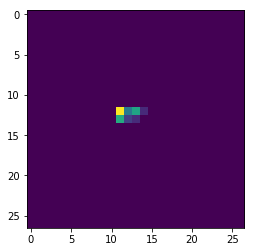

In [64]:
plt.imshow(x)
plt.show()

In [66]:
np.sum(x)

255.0

In [18]:
# create the dmdt for the first points
first_obj = []
for i in range(len(first_x_points)):
    temp = dmdtim(first_x_points[i], first_y_points[i], 27, 27)
    first_obj.append(temp)
    np.save("first_full/first_" + str(i), temp)
first_obj = np.array(first_obj)

In [19]:
random_obj = []
for i in range(len(random_x_points)):
    temp = dmdtim(random_x_points[i], random_y_points[i], 27, 27)
    random_obj.append(temp)
    np.save("random_full/random_" + str(i), temp)
random_obj = np.array(random_obj)

KeyboardInterrupt: 

In [111]:
first_obj.shape

(100, 27, 27)

In [120]:
tt = first_obj.reshape(100, 729)
ttt = random_obj.reshape(100, 729)

In [126]:
from sklearn.manifold import TSNE
x_embedded_tsne_first = TSNE(n_components=2).fit_transform(tt)
x_embedded_tsne_random = TSNE(n_components=2).fit_transform(ttt)

In [127]:
x_embedded_tsne.shape

(100, 2)

In [128]:
x_embedded_umap_first = umap.UMAP().fit_transform(tt)
x_embedded_umap_random = umap.UMAP().fit_transform(ttt)

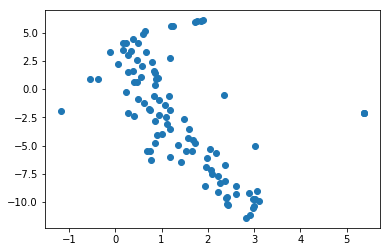

In [136]:
import matplotlib.pyplot as plt
plt.scatter(x_embedded_tsne_first[:, 0], x_embedded_tsne_first[:, 1])
plt.show()

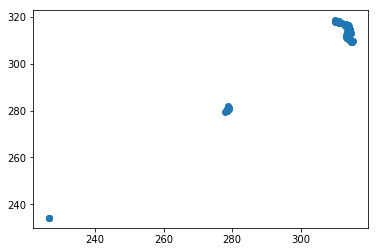

In [137]:
plt.scatter(x_embedded_umap_first[:, 0], x_embedded_umap_first[:, 1])
plt.show()

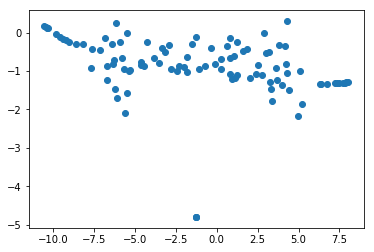

In [138]:
plt.scatter(x_embedded_tsne_random[:, 0], x_embedded_tsne_random[:, 1])
plt.show()

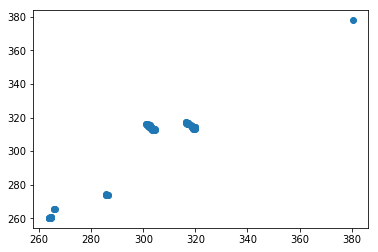

In [139]:
plt.scatter(x_embedded_umap_random[:, 0], x_embedded_umap_random[:, 1])
plt.show()

In [21]:
first_obj.shape

(2196, 27, 27)

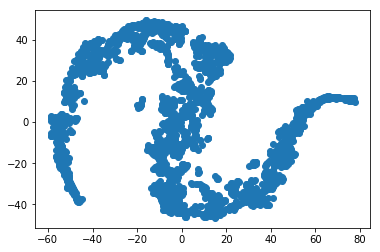

In [22]:
tt = first_obj.reshape(2196, 729)
from sklearn.manifold import TSNE
x_embedded_tsne_first = TSNE(n_components=2).fit_transform(tt)
x_embedded_umap_first = umap.UMAP().fit_transform(tt)
import matplotlib.pyplot as plt
plt.scatter(x_embedded_tsne_first[:, 0], x_embedded_tsne_first[:, 1])
plt.show()

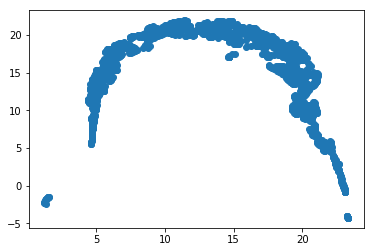

In [23]:
plt.scatter(x_embedded_umap_first[:, 0], x_embedded_umap_first[:, 1])
plt.show()

In [34]:
dmdt_ex = np.load("first_full/first_2001.npy")

In [35]:
dmdt_ex.shape

(27, 27)

In [43]:
plt.imshow(dmdt_ex)

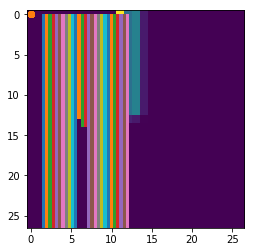

In [44]:
plt.show()

In [45]:
dmdt_ex.shape

(27, 27)

In [55]:
np.count_nonzero(dmdt_ex)

56

In [57]:
np.sum(dmdt_ex)

3397.8093959731546